In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.linear_model import LinearRegression

% matplotlib inline

In [4]:
users = pd.read_csv('myanimelist/users_filtered.csv');
animes = pd.read_csv('myanimelist/anime_filtered.csv');
user_animes = pd.read_csv('manipulated_data/UserAnimeRandom.csv');

In [5]:
# Adds age column
users['age'] = users['birth_date'].apply(lambda x: 2018 - int(x.split("-")[0]))

# Merges user_animes with users
merged = users.merge(user_animes, left_on='username', right_on='username', how='outer')

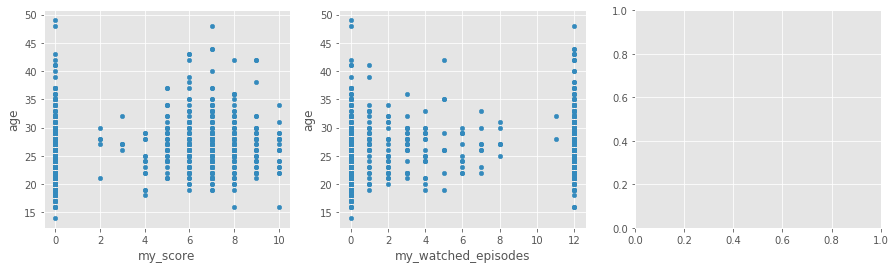

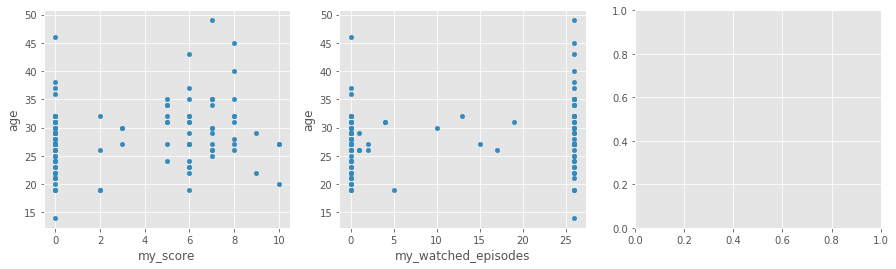

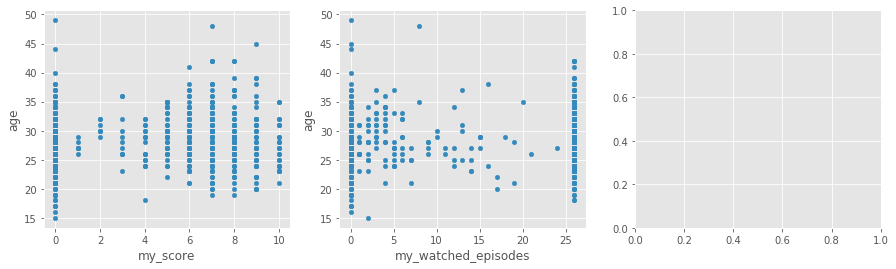

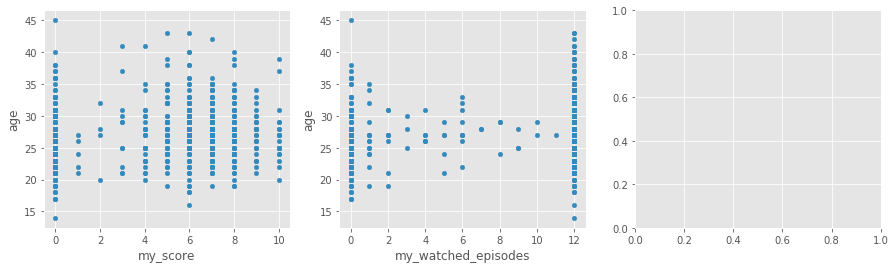

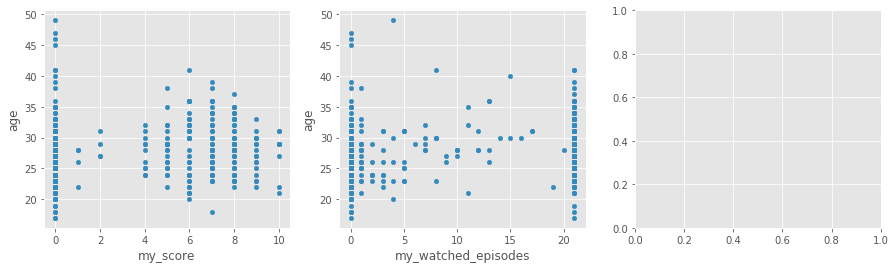

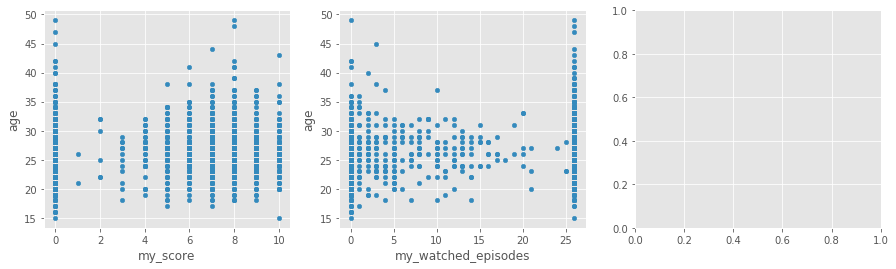

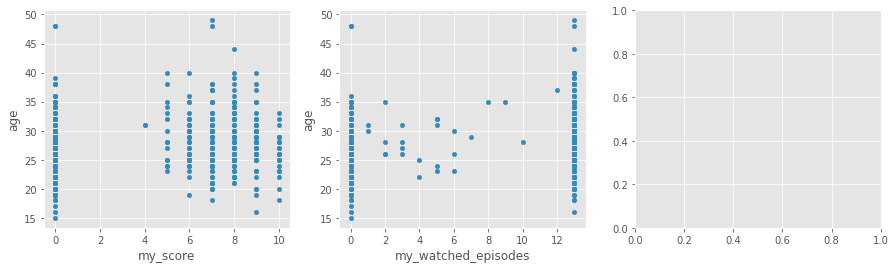

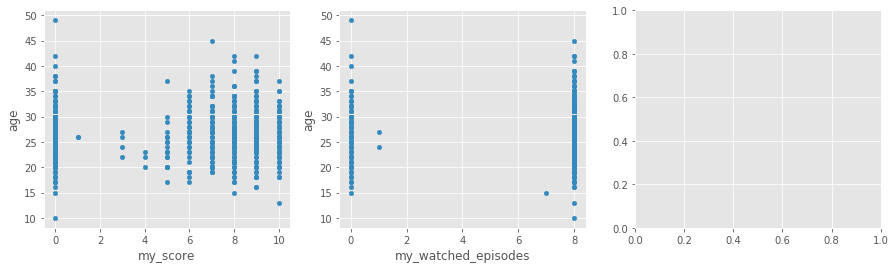

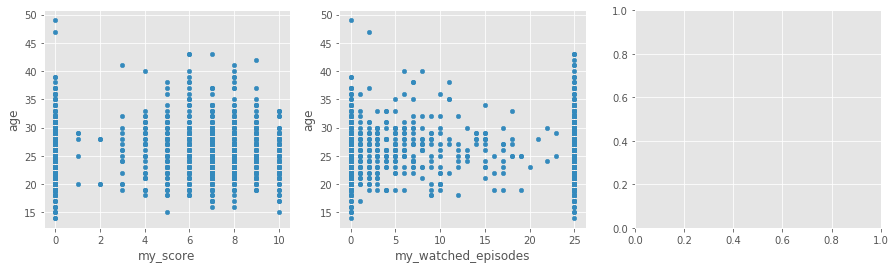

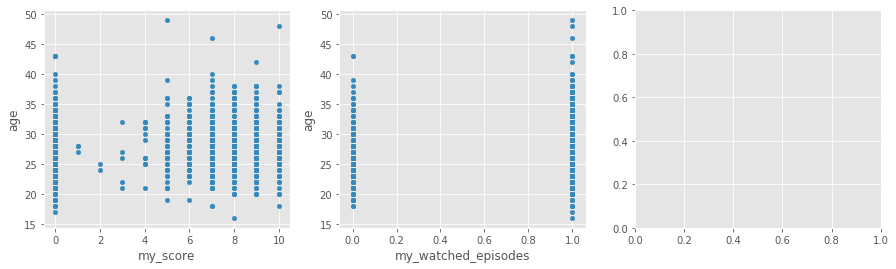

In [6]:
count = 0
for anime_id in merged.anime_id.unique():
    if (not np.isnan(anime_id) and count < 10):
        anime_relation = merged[merged.anime_id == anime_id]

        figs, axes = plt.subplots(1,3,figsize=(15,4))
        anime_relation[['my_score','age']].plot.scatter(x='my_score',y='age',ax=axes[0])
        anime_relation[['my_watched_episodes','age']].plot.scatter(x='my_watched_episodes',y='age',ax=axes[1])
#         anime_relation[['gender', 'my_watched_episodes']].plot.bar(x='gender',y='my_watched_episodes',ax=axes[2])
        count += 1
